In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    classification_report,
    confusion_matrix
)

plt.rcParams["figure.figsize"] = (6, 4)
sns.set(style="whitegrid")

# Make sure the dataset file is in the same directory as this notebook
df = pd.read_csv("StudentsPerformance.csv")


In [3]:
df.info()
df[["math score", "reading score", "writing score"]].describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


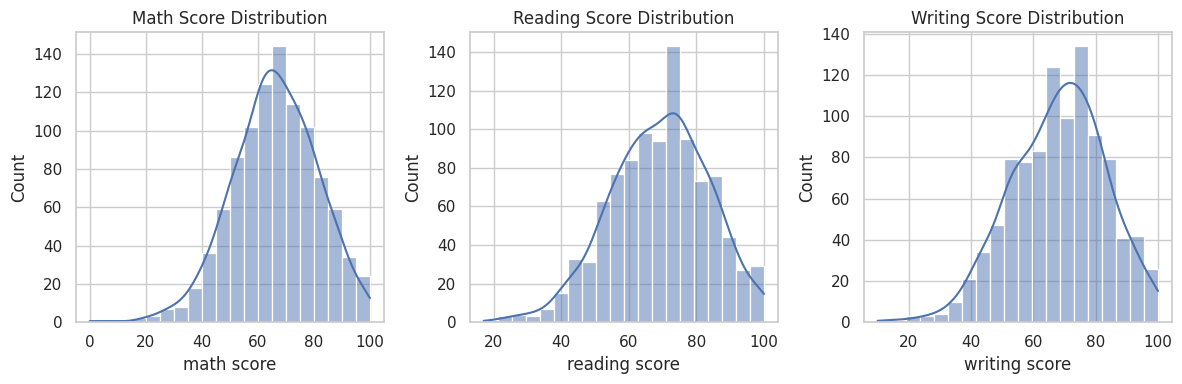

In [4]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.histplot(df["math score"], bins=20, kde=True)
plt.title("Math Score Distribution")

plt.subplot(1, 3, 2)
sns.histplot(df["reading score"], bins=20, kde=True)
plt.title("Reading Score Distribution")

plt.subplot(1, 3, 3)
sns.histplot(df["writing score"], bins=20, kde=True)
plt.title("Writing Score Distribution")

plt.tight_layout()
plt.show()


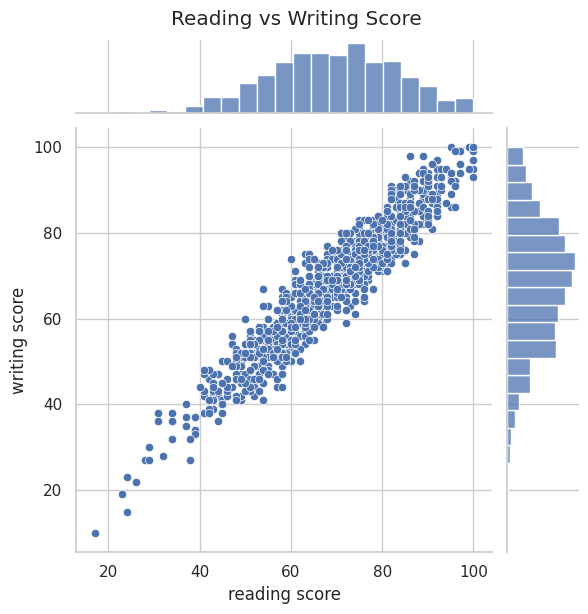

In [5]:
sns.jointplot(
    x="reading score",
    y="writing score",
    data=df,
    kind="scatter",
    height=6
)
plt.suptitle("Reading vs Writing Score", y=1.02)
plt.show()


In [6]:
df["avg_score"] = (df["math score"] + df["reading score"] + df["writing score"]) / 3
df["pass"] = np.where(df["avg_score"] >= 60, 1, 0)


y = df["pass"]

X = df.drop(columns=[
    "math score",
    "reading score",
    "writing score",
    "avg_score",
    "pass"
])

X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none


In [7]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape :", X_test.shape)


Train shape: (800, 5)
Test shape : (200, 5)


In [8]:

X_train_enc = pd.get_dummies(X_train, drop_first=True)
X_test_enc  = pd.get_dummies(X_test, drop_first=True)

X_test_enc = X_test_enc.reindex(columns=X_train_enc.columns, fill_value=0)

print("Encoded train shape:", X_train_enc.shape)
X_train_enc.head()


Encoded train shape: (800, 12)


,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
84,True,False,False,True,False,False,True,False,False,False,False,True
424,True,True,False,False,False,False,False,False,True,False,False,True
649,False,False,False,True,False,False,False,False,True,False,True,False
292,True,False,True,False,False,False,False,False,False,True,True,False
534,True,True,False,False,False,False,True,False,False,False,True,False


In [9]:
majority_class = y_train.mode()[0]
baseline_pred = np.full_like(y_test, fill_value=majority_class)

baseline_acc = accuracy_score(y_test, baseline_pred)
print("Baseline (majority class) accuracy:", baseline_acc)


Baseline (majority class) accuracy: 0.715


In [10]:

log_model = LogisticRegression(max_iter=2000)
log_model.fit(X_train_enc, y_train)


y_pred_log = log_model.predict(X_test_enc)
y_prob_log = log_model.predict_proba(X_test_enc)[:, 1]

print("Logistic Regression accuracy:", accuracy_score(y_test, y_pred_log))
print("\nLogistic Regression classification report:")
print(classification_report(y_test, y_pred_log))


Logistic Regression accuracy: 0.68

Logistic Regression classification report:
              precision    recall  f1-score   support

           0       0.39      0.21      0.27        57
           1       0.73      0.87      0.79       143

    accuracy                           0.68       200
   macro avg       0.56      0.54      0.53       200
weighted avg       0.63      0.68      0.65       200



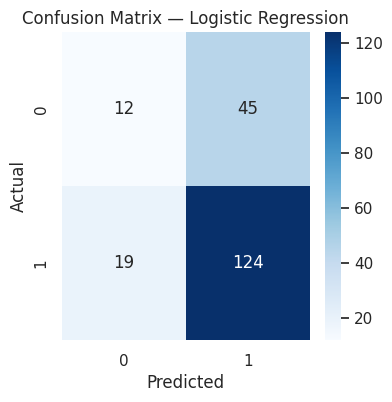

In [11]:
cm_log = confusion_matrix(y_test, y_pred_log)

plt.figure(figsize=(4,4))
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix — Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


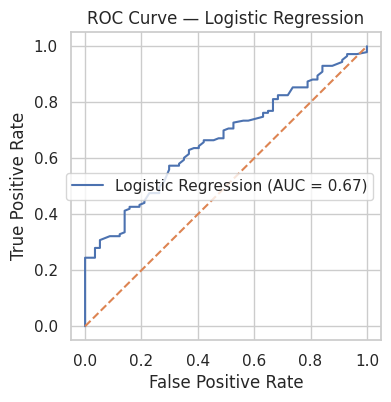

In [12]:
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
auc_log = roc_auc_score(y_test, y_prob_log)

plt.figure(figsize=(4,4))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc_log:.2f})")
plt.plot([0, 1], [0, 1], "--")
plt.title("ROC Curve — Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


In [13]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)
rf_model.fit(X_train_enc, y_train)

y_pred_rf = rf_model.predict(X_test_enc)
y_prob_rf = rf_model.predict_proba(X_test_enc)[:, 1]

print("Random Forest (basic) accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nRandom Forest (basic) classification report:")
print(classification_report(y_test, y_pred_rf))


Random Forest (basic) accuracy: 0.705

Random Forest (basic) classification report:
              precision    recall  f1-score   support

           0       0.47      0.28      0.35        57
           1       0.75      0.87      0.81       143

    accuracy                           0.70       200
   macro avg       0.61      0.58      0.58       200
weighted avg       0.67      0.70      0.68       200



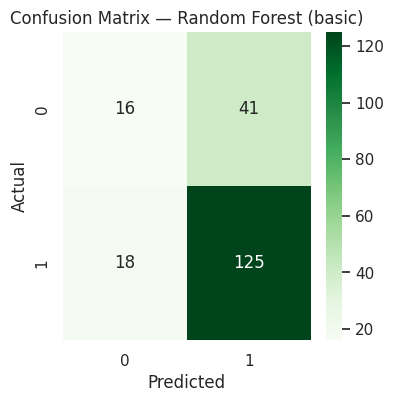

In [14]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(4,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix — Random Forest (basic)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


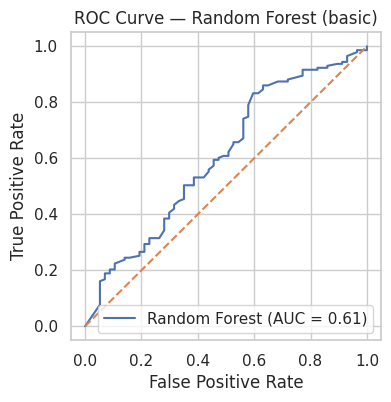

In [15]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(4,4))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot([0, 1], [0, 1], "--")
plt.title("ROC Curve — Random Forest (basic)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


In [16]:
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_enc, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best CV AUC:", grid_search.best_score_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best CV AUC: 0.7285792016272564


In [17]:
best_rf_model = grid_search.best_estimator_

y_pred_opt = best_rf_model.predict(X_test_enc)
y_prob_opt = best_rf_model.predict_proba(X_test_enc)[:, 1]

print("Optimized Random Forest accuracy:", accuracy_score(y_test, y_pred_opt))
print("\nOptimized Random Forest classification report:")
print(classification_report(y_test, y_pred_opt))


Optimized Random Forest accuracy: 0.695

Optimized Random Forest classification report:
              precision    recall  f1-score   support

           0       0.40      0.14      0.21        57
           1       0.73      0.92      0.81       143

    accuracy                           0.69       200
   macro avg       0.56      0.53      0.51       200
weighted avg       0.63      0.69      0.64       200



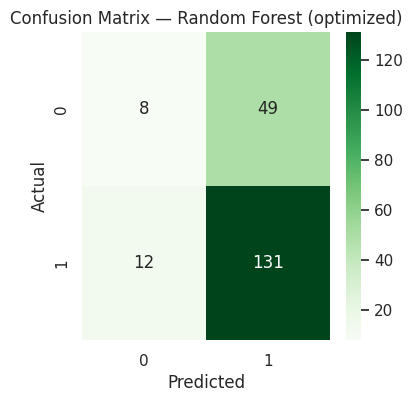

In [18]:
cm_opt = confusion_matrix(y_test, y_pred_opt)

plt.figure(figsize=(4,4))
sns.heatmap(cm_opt, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix — Random Forest (optimized)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


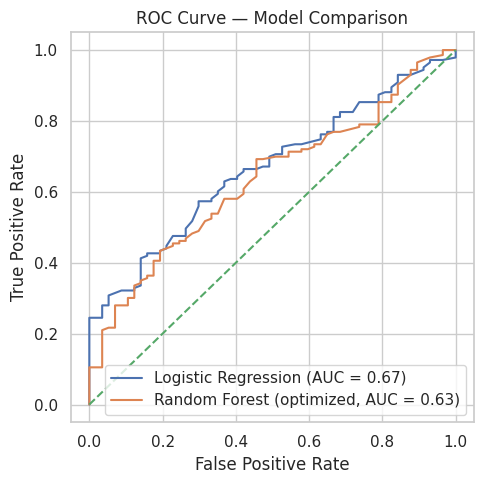

In [19]:
fpr_opt, tpr_opt, _ = roc_curve(y_test, y_prob_opt)
auc_opt = roc_auc_score(y_test, y_prob_opt)

plt.figure(figsize=(5,5))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc_log:.2f})")
plt.plot(fpr_opt, tpr_opt, label=f"Random Forest (optimized, AUC = {auc_opt:.2f})")
plt.plot([0, 1], [0, 1], "--")
plt.title("ROC Curve — Model Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.show()


/tmp/ipython-input-2226411463.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


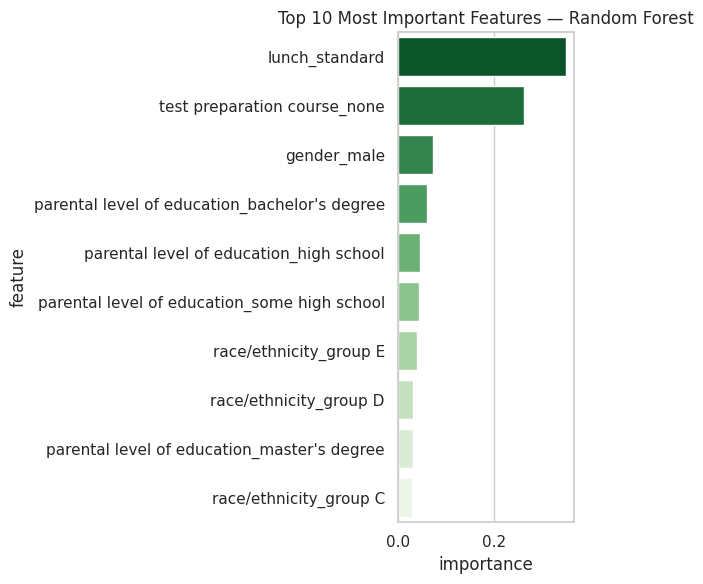

,feature,importance
10,lunch_standard,0.348223
11,test preparation course_none,0.261663
0,gender_male,0.072480
5,parental level of education_bachelor's degree,0.059752
6,parental level of education_high school,0.045685
9,parental level of education_some high school,0.043291
4,race/ethnicity_group E,0.039546
3,race/ethnicity_group D,0.031382
7,parental level of education_master's degree,0.030514
2,race/ethnicity_group C,0.029099


In [20]:
importances = pd.DataFrame({
    "feature": X_train_enc.columns,
    "importance": best_rf_model.feature_importances_
}).sort_values("importance", ascending=False)

plt.figure(figsize=(6,6))
sns.barplot(
    x="importance",
    y="feature",
    data=importances.head(10),
    palette="Greens_r"
)
plt.title("Top 10 Most Important Features — Random Forest")
plt.tight_layout()
plt.show()

importances.head(10)


In [21]:
test_results = X_test.copy()
test_results["Actual_Pass"] = y_test.values
test_results["Predicted_Pass"] = y_pred_opt

errors = test_results[test_results["Actual_Pass"] != test_results["Predicted_Pass"]]
errors.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,Actual_Pass,Predicted_Pass
365,male,group A,bachelor's degree,free/reduced,completed,0,1
284,female,group B,some high school,standard,none,0,1
18,male,group C,master's degree,free/reduced,completed,0,1
174,female,group C,bachelor's degree,free/reduced,completed,0,1
143,male,group A,high school,standard,none,0,1


In [22]:
errors["parental level of education"].value_counts(normalize=True)


,proportion
parental level of education,
some high school,0.295082
high school,0.278689
associate's degree,0.163934
bachelor's degree,0.131148
some college,0.114754
master's degree,0.016393
